# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

# Read Data 

In [2]:
df_cleaned = pd.read_csv('stock_prices_cleaned.csv')
# Convert 'Date' to datetime format 
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
# filter for MSFT only
msft_df = df_cleaned[df_cleaned['Ticker'] == 'MSFT'].copy()
print(f"shape: {msft_df.shape}")
msft_df.head()

shape: (6287, 14)


,Date,Ticker,Volume,High,Low,Open,Close,target_next_close,daily_return,moving_avg_5,moving_avg_10,volatility_5,target_next_close_lag1,target_next_close_lag2
3,2000-01-04,MSFT,54119000.0,35.965035,34.468091,34.871114,34.583241,6.078384,-0.008255,26.418558,24.471379,20.672187,34.583241,10.991455
10,2000-01-05,MSFT,64059600.0,35.734727,33.585270,34.122634,34.947872,6.172822,0.024184,27.054320,24.422838,21.626970,34.947872,10.815356
17,2000-01-06,MSFT,54976600.0,34.967073,33.278214,34.448901,33.777195,6.053217,-0.019499,26.712292,24.471946,21.144214,33.777195,11.211576
24,2000-01-07,MSFT,62013600.0,34.468096,32.951960,33.354983,34.218605,6.105103,0.025892,26.928028,24.392922,21.069918,34.218605,11.094181
31,2000-01-10,MSFT,44963600.0,34.909497,34.199408,34.832730,34.468090,6.191578,-0.010468,27.397314,24.638620,21.868891,34.468090,11.343650


# Data Pre-processing 

In [3]:
# Select features and target
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
target_col = 'target_next_close'
# Drop any rows with missing values
msft_df = msft_df[feature_cols + [target_col, 'Date']].dropna()

In [4]:
# Scale the features and target
sc = MinMaxScaler(feature_range=(0, 1))
# Apply scaling to all numeric columns (excluding Date)
arr_scaled = sc.fit_transform(msft_df.drop(columns=['Date']))

# Convert the scaled result back into a DataFrame for easier handling
df_scaled = pd.DataFrame(arr_scaled, columns=feature_cols + [target_col])

In [5]:
df_scaled.shape

(6287, 6)

In [6]:
# Creating Features and Target
X = df_scaled.iloc[:, :5].values  
y = df_scaled.iloc[:, 5:].values 

In [7]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (6287, 5)
y shape: (6287, 1)


In [8]:
split = int(0.70 * len(X))  # 70% for training
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [9]:
X_train.shape, y_train.shape

((4400, 5), (4400, 1))

In [10]:
# Define a plotting function for time series data
def show_plot(data, title):
    plt.figure(figsize=(13, 5))
    plt.plot(data, linewidth=2.5)
    plt.title(title)
    plt.xlabel("Time Index")
    plt.ylabel("Scaled Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


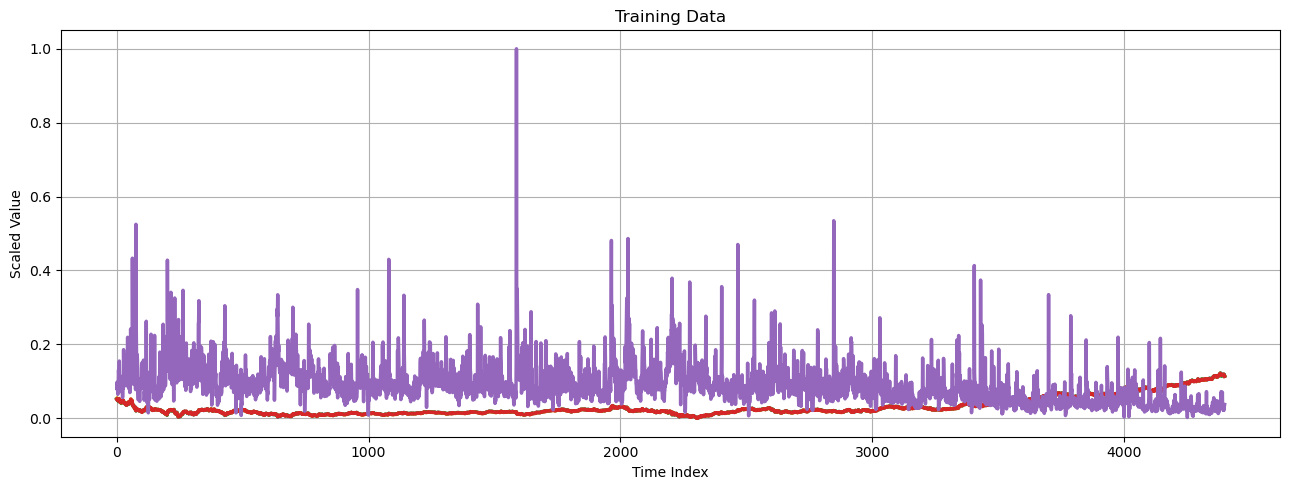

In [11]:
# Visualize the training and testing feature data
show_plot(X_train, 'Training Data')


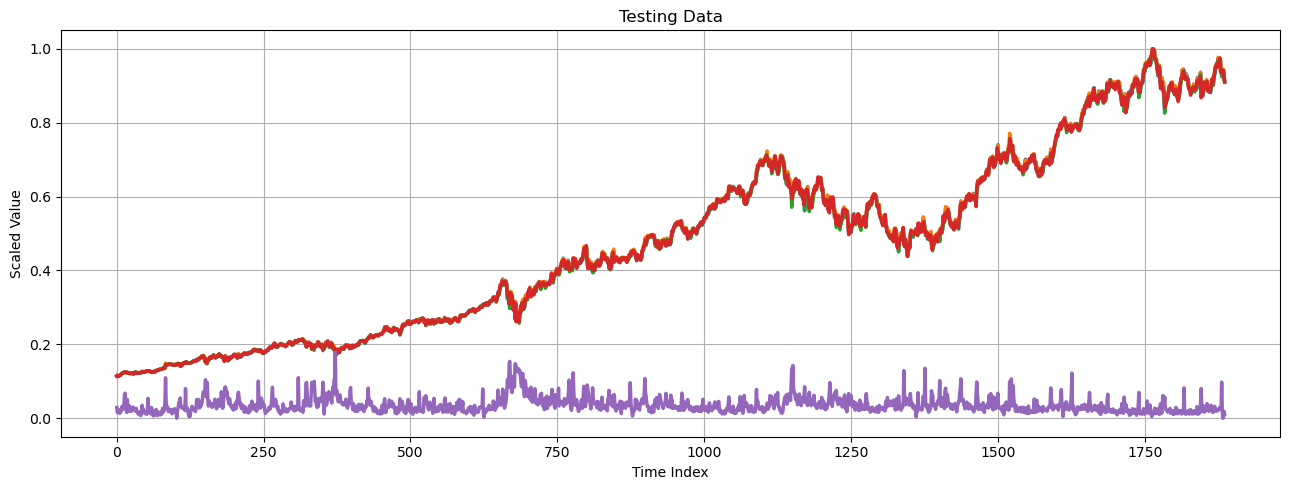

In [12]:
show_plot(X_test, 'Testing Data')

In [13]:
# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [14]:
# Make predictions and evaluate
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 6.1741
R² Score: -717.0371


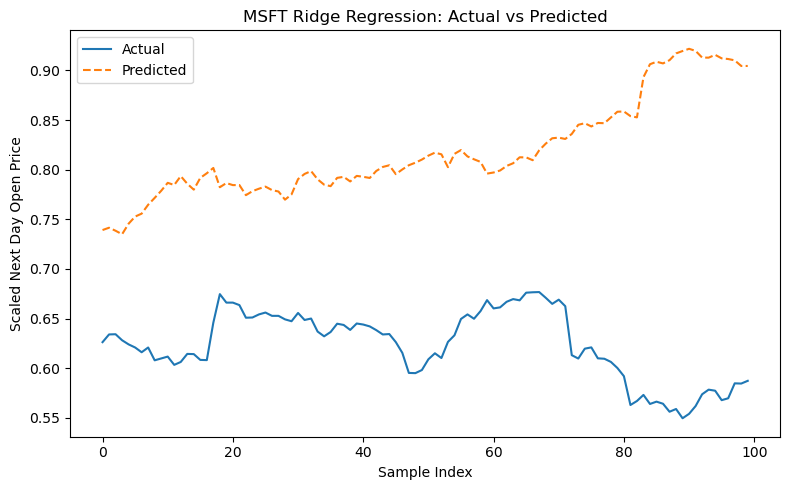

In [16]:
# Plot actual vs predicted (optional)
plt.figure(figsize=(8,5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted', linestyle='dashed')
plt.title("MSFT Ridge Regression: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Scaled Next Day Open Price")
plt.legend()
plt.tight_layout()
plt.show()